<a href="https://colab.research.google.com/github/sgywhetstone/CholletDLWorkbooks/blob/master/CholletC3IMBDClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a simple binary classification task taken from C3.4 of Chollet. This network classifies IMDB movie reviews into 'positive' and 'negative' categories. Training is done on 25k reviews taken from the Keras IMBD dataset.


In [1]:
import keras
import numpy as np
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [0]:
#Set the number of words we keep from the reviews - e.g. if max_words = 10000, we keep only the top 10 000 most common words
max_words = 10000

7/3/19 - Change in numpy leads to book implementation failing to load data. Fix from https://stackoverflow.com/a/56243777 

Orginal implementation retains only lines 1 and 10. 

In [0]:
from keras.datasets import imdb

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words= max_words)

# restore np.load for future normal usage
np.load = np_load_old

In [0]:
#This decodes a selected review
#word_index is a dictionary (word, index)
word_index = imdb.get_word_index()
#flip the dictionary
reverse_word_index = dict(
  [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i-3, '?') for i in train_data[24000]])

In [0]:
#Encode the reviews via one-hot encoding
def vectorize_sequences(sequences, dimension = max_words):  #One-hot function
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

#Vectorize training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#Vectorize training and test labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

We build a 3 layer network via Sequential - Two 16-dimensional relu layers, and one sigmoid layer to output probability. 

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W0706 13:17:29.887537 140364524390272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0706 13:17:29.909457 140364524390272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0706 13:17:29.912397 140364524390272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [7]:
#Using prepackaged functions from Keras
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

W0706 13:17:29.964915 140364524390272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0706 13:17:29.995988 140364524390272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0706 13:17:30.003417 140364524390272 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
#validating the data
#Create a 10k sample validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
#Train the model (20 epochs)
history = model.fit(partial_x_train,
                    partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

W0706 13:17:30.270030 140364524390272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - val_ac

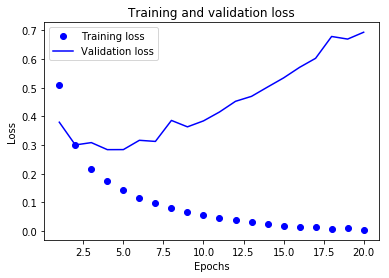

In [11]:
#Plot training/validation loss
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

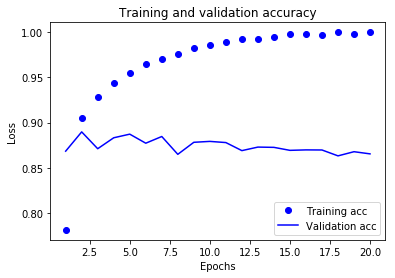

In [12]:
plt.clf()

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [14]:
np.argmin(val_loss)

3

In [15]:
np.argmax(val_acc)

1

In [18]:
#Retrain model

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=np.argmin(val_loss), batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
25000/25000 [==============================] - 2s 76us/step - loss: 0.4566 - acc: 0.8157
Epoch 2/3
25000/25000 [==============================] - 2s 63us/step - loss: 0.2582 - acc: 0.9098
Epoch 3/3
25000/25000 [==============================] - 2s 94us/step


In [19]:
results

[0.28697851531028745, 0.885]

In [20]:
model.predict(x_test)

array([[0.18404585],
       [0.99985695],
       [0.7859845 ],
       ...,
       [0.11967775],
       [0.07884619],
       [0.55220807]], dtype=float32)